In [1]:
# Required imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.feature_selection import mutual_info_regression, mutual_info_classif
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error, classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
import seaborn as sns

In [3]:
data = pd.read_csv("/vol/miltank/projects/practical_sose25/in_context_learning/data/regression/train_ALL.csv")
data.head(10)

,spleen_shape_Elongation_fat,spleen_shape_Flatness_fat,spleen_shape_LeastAxisLength_fat,spleen_shape_MajorAxisLength_fat,spleen_shape_Maximum2DDiameterColumn_fat,spleen_shape_Maximum2DDiameterRow_fat,spleen_shape_Maximum2DDiameterSlice_fat,spleen_shape_Maximum3DDiameter_fat,spleen_shape_MeshVolume_fat,spleen_shape_MinorAxisLength_fat,...,bone_other_glszm_SmallAreaHighGrayLevelEmphasis_wat,bone_other_glszm_SmallAreaLowGrayLevelEmphasis_wat,bone_other_glszm_ZoneEntropy_wat,bone_other_glszm_ZonePercentage_wat,bone_other_glszm_ZoneVariance_wat,bone_other_ngtdm_Busyness_wat,bone_other_ngtdm_Coarseness_wat,bone_other_ngtdm_Complexity_wat,bone_other_ngtdm_Contrast_wat,bone_other_ngtdm_Strength_wat
0,1.077312,0.424367,-1.270613,-1.773525,-2.009409,-1.068459,-0.799019,-1.723058,-1.227353,-0.854047,...,0.069436,0.088915,1.103963,-0.168995,-0.303318,-0.137633,-0.033272,0.437886,0.548898,-0.119484
1,-0.782423,-1.073579,0.103742,1.114423,0.415821,1.959367,-0.180145,1.370891,0.485275,0.267782,...,0.209882,-1.700729,-0.626554,1.359820,-1.365421,-0.360860,-0.033271,-2.947104,-2.596361,0.649780
2,-0.256668,-1.701477,-1.258038,-0.125283,-0.550184,0.137893,-0.444353,-0.367462,-0.729381,-0.293387,...,0.110144,-0.149042,0.881668,0.008677,-1.224330,-0.302995,-0.033272,1.093126,0.780321,-0.098811
3,0.173270,-0.433038,0.050785,0.415727,0.467872,-1.177694,0.574671,0.625412,0.613033,0.583290,...,0.355943,-0.354909,1.100155,-0.196654,0.211685,0.024192,-0.033272,-0.368249,-0.096155,-0.117467
4,1.857080,-0.281415,-1.012666,-1.007517,-0.697967,-0.501183,1.210148,-0.794213,-0.501334,0.535716,...,-0.137720,1.169139,-0.226834,-0.236024,1.277597,0.018791,-0.033272,0.992557,0.993563,-0.122361
5,-1.683787,-1.266556,0.456858,1.807430,1.467348,1.524055,-0.834581,1.318332,0.582712,-0.150804,...,-1.528101,-0.726865,-1.150200,-0.278772,0.941479,-0.171050,-0.033272,0.454881,0.583146,-0.115310
6,-0.073106,1.039274,-0.005682,-0.785452,-0.264943,-0.103115,-0.719121,-0.660344,-0.428102,-0.731208,...,-0.428892,-0.867777,0.961372,-0.012988,-1.039863,-0.315447,-0.033272,-0.351868,-0.716720,-0.100551
7,0.040180,-1.915297,-1.689699,-0.549478,-1.015238,-0.701405,-0.618649,-0.757998,-0.989475,-0.425655,...,0.058925,-0.301268,1.031193,-0.210802,0.679077,0.100834,-0.033272,-0.705099,-0.339451,-0.120378
8,-1.169482,0.198100,3.467410,3.805348,1.027741,4.128613,4.531831,3.932841,4.101400,1.957665,...,0.189422,0.178218,0.100917,-0.182043,0.139896,-0.011043,-0.033272,-0.862379,-0.515690,-0.112572
9,-0.549929,1.637865,2.566088,1.399298,1.286748,0.868099,0.783527,1.421617,1.907076,0.744444,...,-1.563666,-0.847212,-1.110570,-0.064091,-1.210336,-0.332564,-0.033272,-0.018074,-0.027105,-0.068267


In [75]:
print(data.columns.tolist())

['spleen_shape_Elongation_fat', 'spleen_shape_Flatness_fat', 'spleen_shape_LeastAxisLength_fat', 'spleen_shape_MajorAxisLength_fat', 'spleen_shape_Maximum2DDiameterColumn_fat', 'spleen_shape_Maximum2DDiameterRow_fat', 'spleen_shape_Maximum2DDiameterSlice_fat', 'spleen_shape_Maximum3DDiameter_fat', 'spleen_shape_MeshVolume_fat', 'spleen_shape_MinorAxisLength_fat', 'spleen_shape_Sphericity_fat', 'spleen_shape_SurfaceArea_fat', 'spleen_shape_SurfaceVolumeRatio_fat', 'spleen_shape_VoxelVolume_fat', 'spleen_firstorder_10Percentile_fat', 'spleen_firstorder_90Percentile_fat', 'spleen_firstorder_Energy_fat', 'spleen_firstorder_Entropy_fat', 'spleen_firstorder_InterquartileRange_fat', 'spleen_firstorder_Kurtosis_fat', 'spleen_firstorder_Maximum_fat', 'spleen_firstorder_MeanAbsoluteDeviation_fat', 'spleen_firstorder_Mean_fat', 'spleen_firstorder_Median_fat', 'spleen_firstorder_Minimum_fat', 'spleen_firstorder_Range_fat', 'spleen_firstorder_RobustMeanAbsoluteDeviation_fat', 'spleen_firstorder_Roo

In [74]:

print(data["drug_consumption"].describe())

KeyError: 'drug_consumption'

In [58]:
wat_df = pd.read_csv("/vol/miltank/projects/practical_sose25/in_context_learning/data/regression/train_wat.csv")
fat_df = pd.read_csv("/vol/miltank/projects/practical_sose25/in_context_learning/data/regression/train_fat.csv")
radiomics_df = pd.merge(wat_df, fat_df, on="eid", how="inner", suffixes=('_wat', '_fat'))
print("Radiomics merged shape:", radiomics_df.shape)

Radiomics merged shape: (2712, 14983)


KeyError: 'alcohol_consumption'

In [40]:
data = pd.read_csv("/vol/miltank/projects/practical_sose25/in_context_learning/data/other/old_tabular_mae_healthy_train.csv")
data.head(30)


print(data.columns)

Index(['feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4',
       'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9',
       ...
       'alcohol_intake_frequency', 'blood_pressure_diastolic',
       'blood_pressure_systolic', 'mean_reaction_time', 'drug_consumption',
       'alcohol_consumption', 'spine_bone_mineral_density', 'spine_bone_area',
       'grey_matter_volume', 'white_matter_volume'],
      dtype='object', length=1039)


In [4]:
data.columns

Index(['spleen_shape_Elongation_fat', 'spleen_shape_Flatness_fat',
       'spleen_shape_LeastAxisLength_fat', 'spleen_shape_MajorAxisLength_fat',
       'spleen_shape_Maximum2DDiameterColumn_fat',
       'spleen_shape_Maximum2DDiameterRow_fat',
       'spleen_shape_Maximum2DDiameterSlice_fat',
       'spleen_shape_Maximum3DDiameter_fat', 'spleen_shape_MeshVolume_fat',
       'spleen_shape_MinorAxisLength_fat',
       ...
       'bone_other_glszm_SmallAreaHighGrayLevelEmphasis_wat',
       'bone_other_glszm_SmallAreaLowGrayLevelEmphasis_wat',
       'bone_other_glszm_ZoneEntropy_wat',
       'bone_other_glszm_ZonePercentage_wat',
       'bone_other_glszm_ZoneVariance_wat', 'bone_other_ngtdm_Busyness_wat',
       'bone_other_ngtdm_Coarseness_wat', 'bone_other_ngtdm_Complexity_wat',
       'bone_other_ngtdm_Contrast_wat', 'bone_other_ngtdm_Strength_wat'],
      dtype='object', length=14982)

In [42]:
print(data["intelligence"].describe())



KeyError: 'intelligence'

In [25]:
print(data["mean_reaction_time"].describe())


count    2365.000000
mean      591.814799
std       106.688147
min       366.000000
25%       520.000000
50%       573.000000
75%       643.000000
max      1392.000000
Name: mean_reaction_time, dtype: float64


In [5]:
feature_cols = [col for col in data.columns if col.startswith("feature_")]
X_all = data[feature_cols]
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X_all), columns=X_all.columns)

In [7]:
y_age = data['age']
age_model = RandomForestRegressor(n_estimators=100, random_state=42)
age_model.fit(X_scaled, y_age)
data['predicted_age'] = age_model.predict(X_scaled)

In [8]:
print("\n==== Task 1: BrainAgeGap ====")
if 'predicted_age' not in data.columns:
    print("ERROR: 'predicted_age' column not found. Please compute it first.")
else:
    y_gap = data['predicted_age'] - data['age']
    
    # Feature Selection
    mi_gap = mutual_info_regression(X_scaled, y_gap)
    gap_features = pd.Series(mi_gap, index=X_scaled.columns).sort_values(ascending=False).head(30).index.tolist()

    # Model Training
    X_gap = X_scaled[gap_features]
    model_gap = RandomForestRegressor(random_state=42)
    scores_gap = cross_val_score(model_gap, X_gap, y_gap, cv=5, scoring='r2')

    print(f"BrainAgeGap R² (CV mean ± std): {scores_gap.mean():.3f} ± {scores_gap.std():.3f}")



==== Task 1: BrainAgeGap ====
BrainAgeGap R² (CV mean ± std): 0.031 ± 0.025


In [9]:
print("\n==== Task 2: BMI Group ====")
data['BMI_group'] = (data['bmi'] >= 30).astype(int)
y_bmi = data['BMI_group']

mi_bmi = mutual_info_classif(X_scaled, y_bmi)
bmi_features = pd.Series(mi_bmi, index=X_scaled.columns).sort_values(ascending=False).head(30).index.tolist()

X_bmi = X_scaled[bmi_features]
model_bmi = RandomForestClassifier(random_state=42)
scores_bmi = cross_val_score(model_bmi, X_bmi, y_bmi, cv=5, scoring='accuracy')

print(f"BMI Group Accuracy (CV mean ± std): {scores_bmi.mean():.3f} ± {scores_bmi.std():.3f}")


==== Task 2: BMI Group ====
BMI Group Accuracy (CV mean ± std): 0.956 ± 0.010


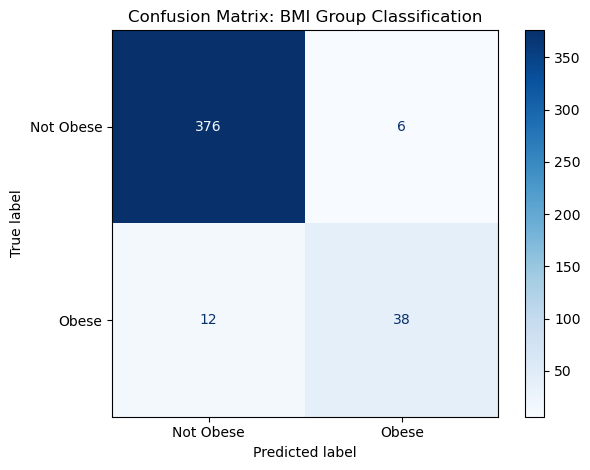

In [ ]:


X_bmi_train, X_bmi_test, y_bmi_train, y_bmi_test = train_test_split(X_bmi, y_bmi, test_size=0.2, random_state=42, stratify=y_bmi)
model_bmi.fit(X_bmi_train, y_bmi_train)
y_bmi_pred = model_bmi.predict(X_bmi_test)

cm = confusion_matrix(y_bmi_test, y_bmi_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Obese", "Obese"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix: BMI Group Classification")
plt.tight_layout()
plt.show()

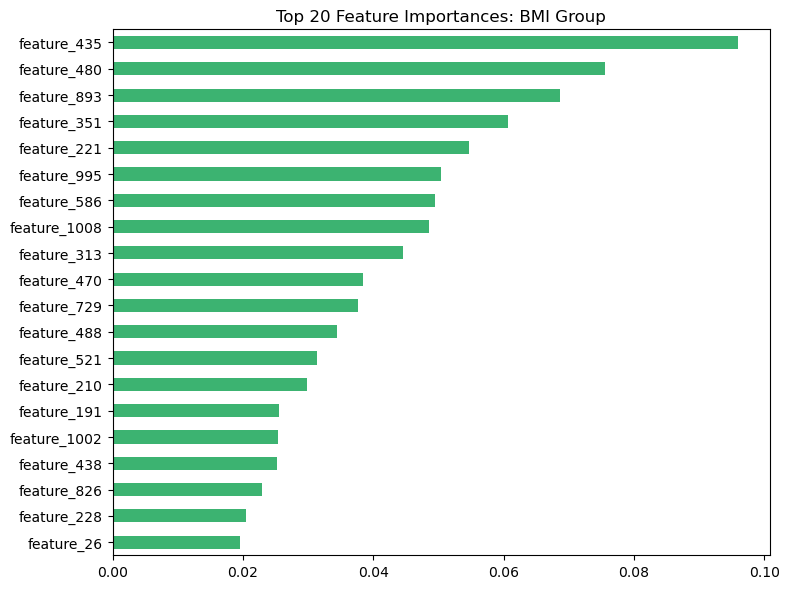

In [ ]:
bmi_importance = pd.Series(model_bmi.feature_importances_, index=X_bmi.columns).sort_values(ascending=False)
bmi_importance.head(20).plot(kind='barh', figsize=(8, 6), color='mediumseagreen')
plt.title("Top 20 Feature Importances: BMI Group")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


=== Training: RandomForest ===
              precision    recall  f1-score   support

   Not Obese       0.98      0.98      0.98       382
       Obese       0.84      0.84      0.84        50

    accuracy                           0.96       432
   macro avg       0.91      0.91      0.91       432
weighted avg       0.96      0.96      0.96       432

ROC AUC: 0.989


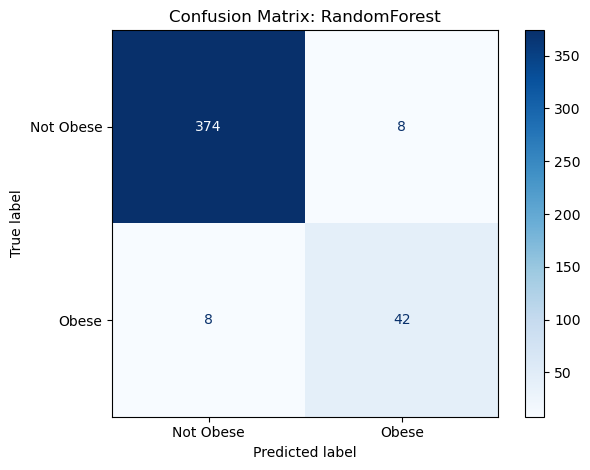

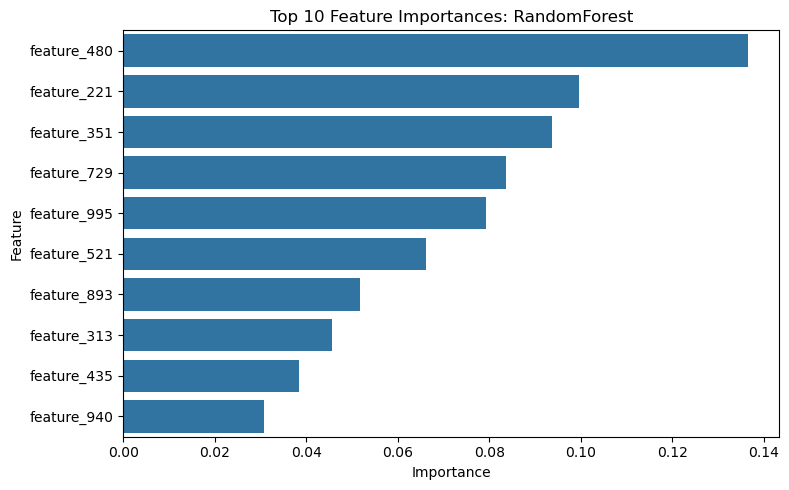


=== Training: XGBoost ===
              precision    recall  f1-score   support

   Not Obese       0.98      0.98      0.98       382
       Obese       0.83      0.86      0.84        50

    accuracy                           0.96       432
   macro avg       0.90      0.92      0.91       432
weighted avg       0.96      0.96      0.96       432

ROC AUC: 0.990


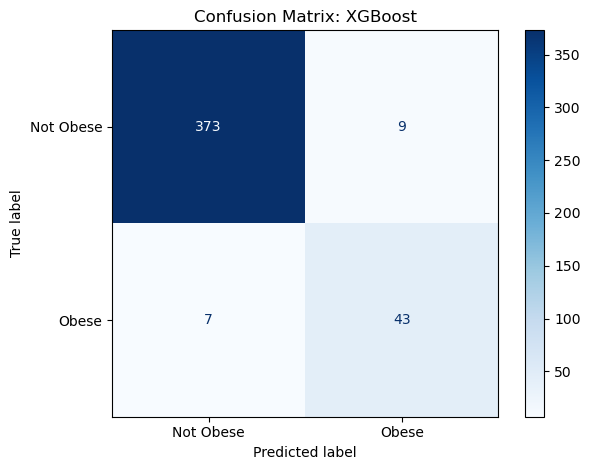

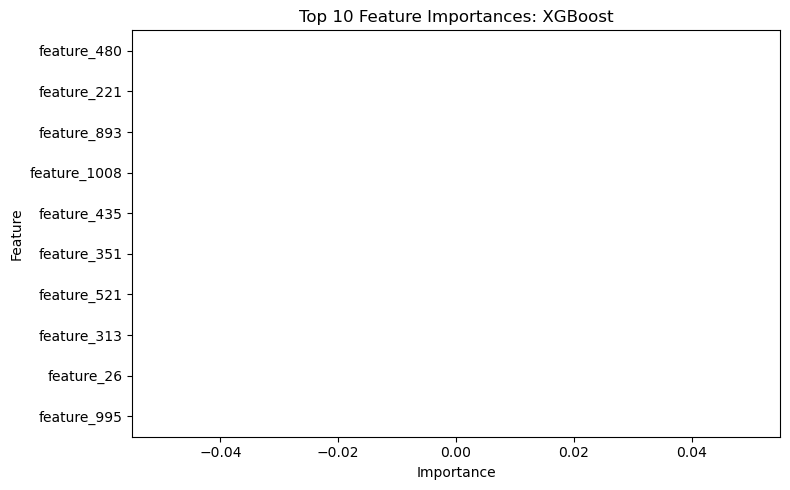


=== Training: LightGBM ===
[LightGBM] [Info] Number of positive: 1529, number of negative: 1529
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000493 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 3058, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
              precision    recall  f1-score   support

   Not Obese       0.98      0.98      0.98       382
       Obese       0.83      0.86      0.84        50

    accuracy                           0.96       432
   macro avg       0.90      0.92      0.91       432
weighted avg       0.96      0.96      0.96       432

ROC AUC: 0.989


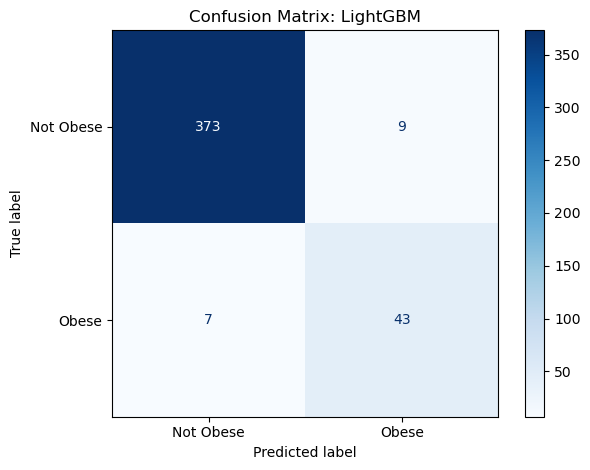

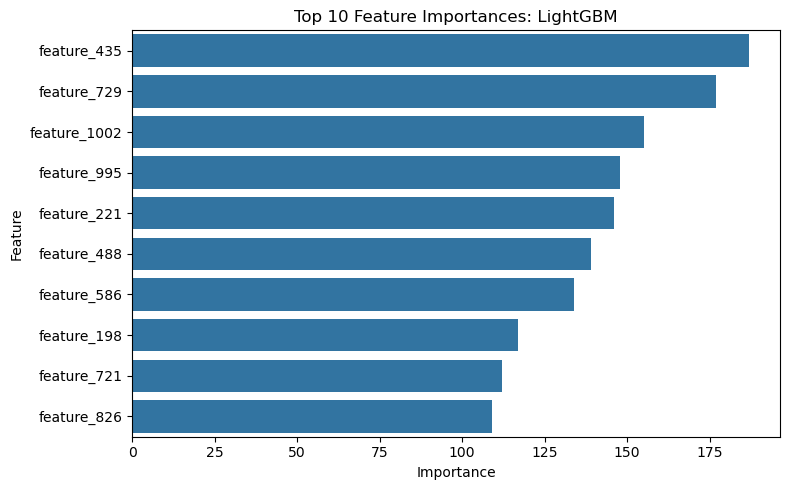

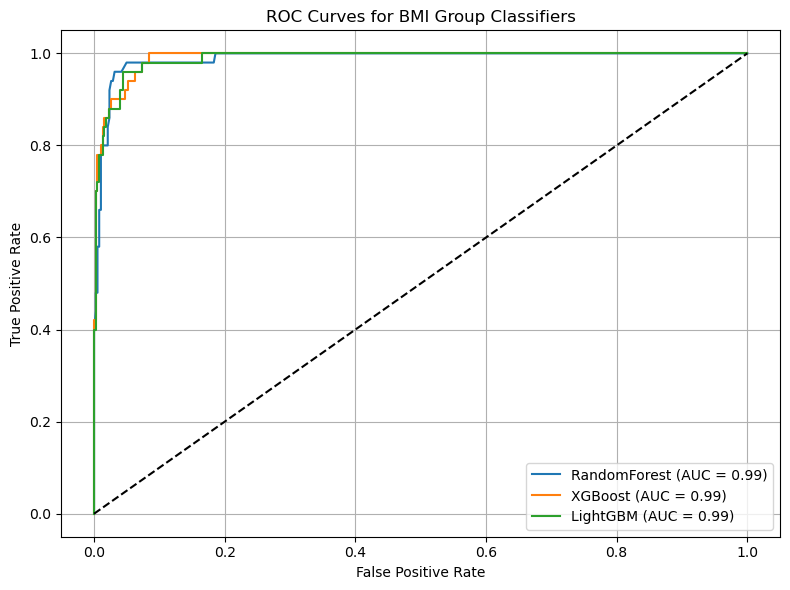


=== Training Stacking Ensemble ===
[LightGBM] [Info] Number of positive: 1223, number of negative: 1223
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000676 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 2446, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 1223, number of negative: 1223
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000808 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 2446, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warni

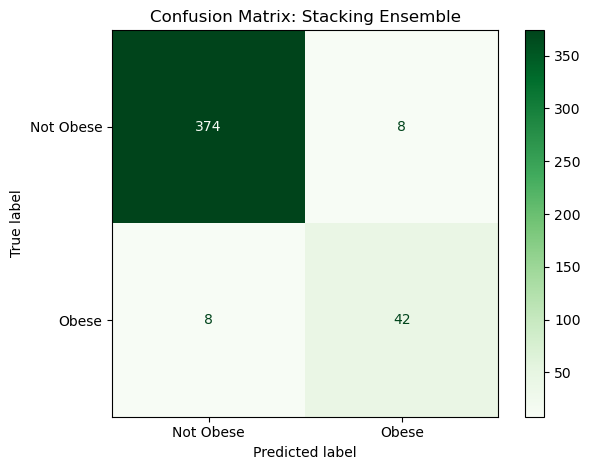

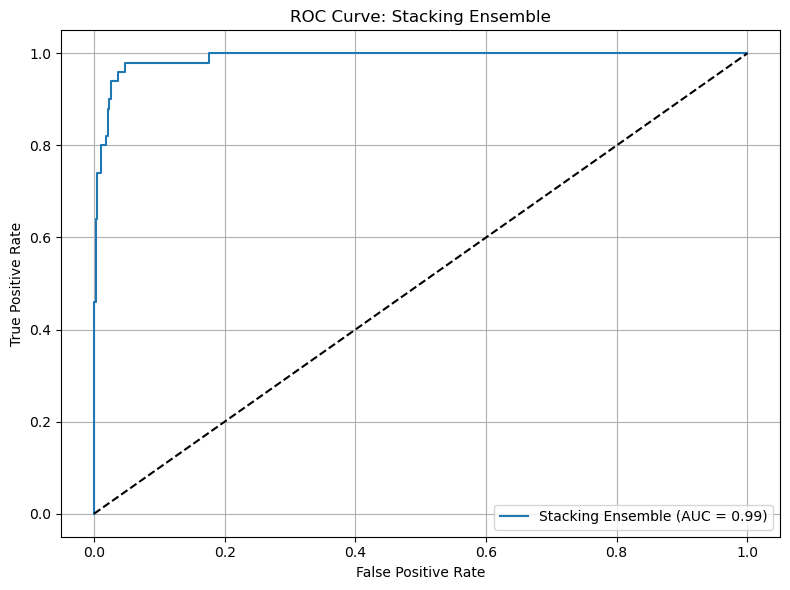


=== Weighted Ensemble Voting ===
              precision    recall  f1-score   support

   Not Obese       0.98      0.98      0.98       382
       Obese       0.83      0.86      0.84        50

    accuracy                           0.96       432
   macro avg       0.90      0.92      0.91       432
weighted avg       0.96      0.96      0.96       432

ROC AUC: 0.988


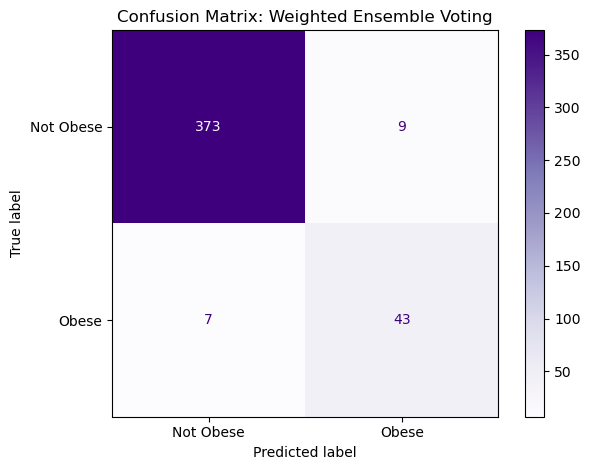

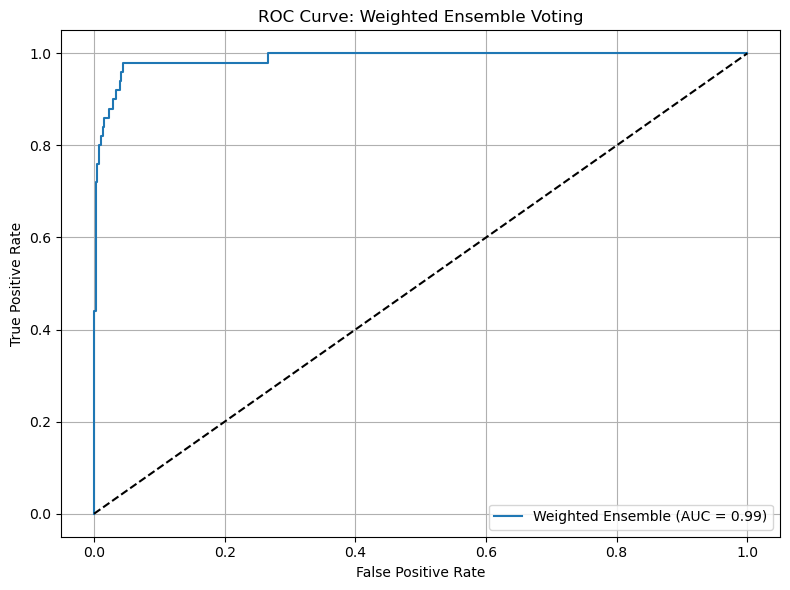

In [ ]:
# BMI Group Classification with SMOTE, XGBoost, LightGBM, Stacking, and Ensemble Voting


# Load and preprocess data
data = pd.read_csv("../data/healthy_train.csv")
data = data.dropna()
data['BMI_group'] = (data['bmi'] >= 30).astype(int)

X = data.drop(columns=['bmi', 'BMI_group'])
y_bmi = data['BMI_group']

# Scale data
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Feature selection using Mutual Information
mi_scores = mutual_info_classif(X_scaled, y_bmi)
selected_features = pd.Series(mi_scores, index=X_scaled.columns).sort_values(ascending=False).head(30).index.tolist()
X_bmi = X_scaled[selected_features]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_bmi, y_bmi, test_size=0.2, stratify=y_bmi, random_state=42)

# Apply SMOTE
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

# Define models
models = {
    'RandomForest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    'LightGBM': LGBMClassifier(random_state=42)
}

results = {}

# Train base models, evaluate, and plot feature importance
for name, model in models.items():
    print(f"\n=== Training: {name} ===")
    model.fit(X_train_res, y_train_res)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    print(classification_report(y_test, y_pred, target_names=["Not Obese", "Obese"]))
    auc = roc_auc_score(y_test, y_proba)
    print(f"ROC AUC: {auc:.3f}")

    results[name] = {
        "model": model,
        "roc_auc": auc,
        "report": classification_report(y_test, y_pred, output_dict=True)
    }

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Obese", "Obese"])
    disp.plot(cmap="Blues")
    plt.title(f"Confusion Matrix: {name}")
    plt.tight_layout()
    plt.show()

    # Feature importance plotting
    if name in ['RandomForest', 'LightGBM']:
        importances = model.feature_importances_
        feat_imp = pd.Series(importances, index=X_train_res.columns).sort_values(ascending=False)
    elif name == 'XGBoost':
        booster = model.get_booster()
        scores = booster.get_score(importance_type='weight')  # Dict like {'f0': 23, 'f1': 10, ...}

        # Initialize zero importances for all features
        feat_imp = pd.Series(0, index=X_train_res.columns)

        # Map 'f0', 'f1', ... to column names safely
        for k, v in scores.items():
            try:
                idx = int(k[1:])
                feat_name = X_train_res.columns[idx]
                feat_imp[feat_name] = v
            except:
                # If any issue, skip
                pass

        feat_imp = feat_imp.sort_values(ascending=False)

    plt.figure(figsize=(8,5))
    sns.barplot(x=feat_imp.values[:10], y=feat_imp.index[:10])
    plt.title(f"Top 10 Feature Importances: {name}")
    plt.xlabel("Importance")
    plt.ylabel("Feature")
    plt.tight_layout()
    plt.show()

# Plot ROC curves for base models
plt.figure(figsize=(8,6))
for name, res in results.items():
    fpr, tpr, _ = roc_curve(y_test, res['model'].predict_proba(X_test)[:, 1])
    plt.plot(fpr, tpr, label=f"{name} (AUC = {res['roc_auc']:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for BMI Group Classifiers")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# === Stacking ===
print("\n=== Training Stacking Ensemble ===")

meta_train = np.zeros((X_train_res.shape[0], len(models)))
meta_test = np.zeros((X_test.shape[0], len(models)))

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for i, (name, model) in enumerate(models.items()):
    meta_val_preds = np.zeros(X_train_res.shape[0])
    meta_test_preds = np.zeros(X_test.shape[0])
    for train_idx, val_idx in kf.split(X_train_res, y_train_res):
        X_tr, X_val = X_train_res.iloc[train_idx], X_train_res.iloc[val_idx]
        y_tr = y_train_res.iloc[train_idx]

        model.fit(X_tr, y_tr)
        meta_val_preds[val_idx] = model.predict_proba(X_val)[:, 1]
        meta_test_preds += model.predict_proba(X_test)[:, 1] / kf.n_splits

    meta_train[:, i] = meta_val_preds
    meta_test[:, i] = meta_test_preds

meta_model = LogisticRegression(random_state=42)
meta_model.fit(meta_train, y_train_res)

stack_preds = meta_model.predict(meta_test)
stack_proba = meta_model.predict_proba(meta_test)[:, 1]

print("\n=== Stacking Model Results ===")
print(classification_report(y_test, stack_preds, target_names=["Not Obese", "Obese"]))
print(f"ROC AUC: {roc_auc_score(y_test, stack_proba):.3f}")

# Confusion matrix for stacking
cm = confusion_matrix(y_test, stack_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Obese", "Obese"])
disp.plot(cmap="Greens")
plt.title("Confusion Matrix: Stacking Ensemble")
plt.tight_layout()
plt.show()

# ROC Curve for stacking
fpr, tpr, _ = roc_curve(y_test, stack_proba)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"Stacking Ensemble (AUC = {roc_auc_score(y_test, stack_proba):.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve: Stacking Ensemble")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# === Weighted Ensemble Voting ===
print("\n=== Weighted Ensemble Voting ===")

weights = {'RandomForest': 0.3, 'XGBoost': 0.4, 'LightGBM': 0.3}
weighted_proba = sum(weights[name] * results[name]['model'].predict_proba(X_test)[:, 1] for name in weights)
weighted_preds = (weighted_proba > 0.5).astype(int)

print(classification_report(y_test, weighted_preds, target_names=["Not Obese", "Obese"]))
print(f"ROC AUC: {roc_auc_score(y_test, weighted_proba):.3f}")

cm = confusion_matrix(y_test, weighted_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Obese", "Obese"])
disp.plot(cmap="Purples")
plt.title("Confusion Matrix: Weighted Ensemble Voting")
plt.tight_layout()
plt.show()

# ROC Curve for weighted ensemble
fpr, tpr, _ = roc_curve(y_test, weighted_proba)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"Weighted Ensemble (AUC = {roc_auc_score(y_test, weighted_proba):.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve: Weighted Ensemble Voting")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [10]:
print("\n==== Task 3: Cognitive Outliers ====")
z_rt = (data['mean_reaction_time'] - data['mean_reaction_time'].mean()) / data['mean_reaction_time'].std()
data['Cognitive_Outlier'] = (z_rt > 2).astype(int)
y_cog = data['Cognitive_Outlier']

mi_cog = mutual_info_classif(X_scaled, y_cog)
cog_features = pd.Series(mi_cog, index=X_scaled.columns).sort_values(ascending=False).head(30).index.tolist()

X_cog = X_scaled[cog_features]
model_cog = RandomForestClassifier(random_state=42)
scores_cog = cross_val_score(model_cog, X_cog, y_cog, cv=5, scoring='accuracy')

print(f"Cognitive Outlier Accuracy (CV mean ± std): {scores_cog.mean():.3f} ± {scores_cog.std():.3f}")



==== Task 3: Cognitive Outliers ====
Cognitive Outlier Accuracy (CV mean ± std): 0.959 ± 0.001


Cognitive Outlier class distribution:
Cognitive_Outlier
0    2071
1      89
Name: count, dtype: int64


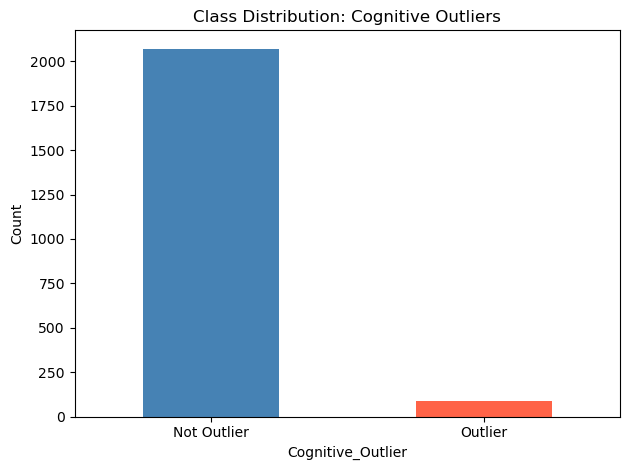

In [14]:
# Class distribution
outlier_counts = data['Cognitive_Outlier'].value_counts()
print("Cognitive Outlier class distribution:")
print(outlier_counts)

outlier_counts.plot(kind='bar', color=['steelblue', 'tomato'])
plt.xticks(ticks=[0, 1], labels=['Not Outlier', 'Outlier'], rotation=0)
plt.title("Class Distribution: Cognitive Outliers")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


Classification Report:
              precision    recall  f1-score   support

 Not Outlier       0.96      1.00      0.98       414
     Outlier       0.00      0.00      0.00        18

    accuracy                           0.96       432
   macro avg       0.48      0.50      0.49       432
weighted avg       0.92      0.96      0.94       432



/meta/projects/practical_sose25/.conda/envs/adlm-icl/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/meta/projects/practical_sose25/.conda/envs/adlm-icl/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/meta/projects/practical_sose25/.conda/envs/adlm-icl/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavi

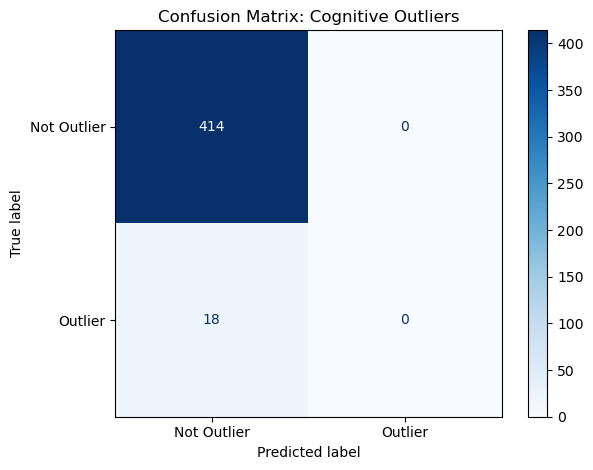

In [15]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Train-test split
X_cog_train, X_cog_test, y_cog_train, y_cog_test = train_test_split(
    X_cog, y_cog, test_size=0.2, random_state=42, stratify=y_cog
)

# Fit + predict
model_cog.fit(X_cog_train, y_cog_train)
y_cog_pred = model_cog.predict(X_cog_test)

# Classification report
print("Classification Report:")
print(classification_report(y_cog_test, y_cog_pred, target_names=["Not Outlier", "Outlier"]))

# Confusion Matrix
cm = confusion_matrix(y_cog_test, y_cog_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Outlier", "Outlier"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix: Cognitive Outliers")
plt.tight_layout()
plt.show()


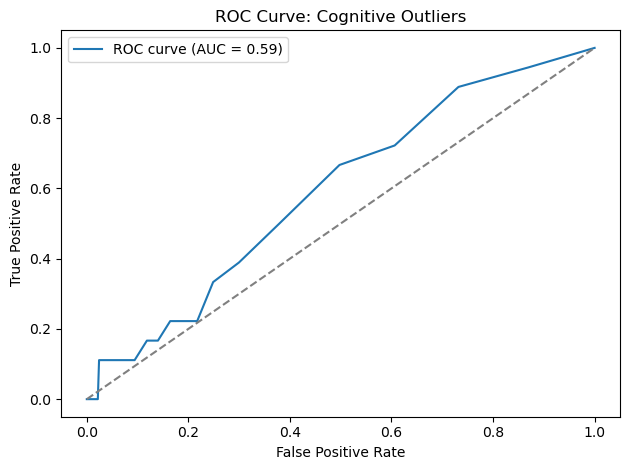

In [16]:
from sklearn.metrics import roc_curve, auc

y_cog_proba = model_cog.predict_proba(X_cog_test)[:, 1]
fpr, tpr, _ = roc_curve(y_cog_test, y_cog_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve: Cognitive Outliers")
plt.legend()
plt.tight_layout()
plt.show()



Best threshold: 0.11 with F1 score: 0.213
Classification report at optimal threshold:
              precision    recall  f1-score   support

 Not Outlier       0.96      0.94      0.95       414
     Outlier       0.12      0.17      0.14        18

    accuracy                           0.91       432
   macro avg       0.54      0.56      0.55       432
weighted avg       0.93      0.91      0.92       432

ROC AUC: 0.634


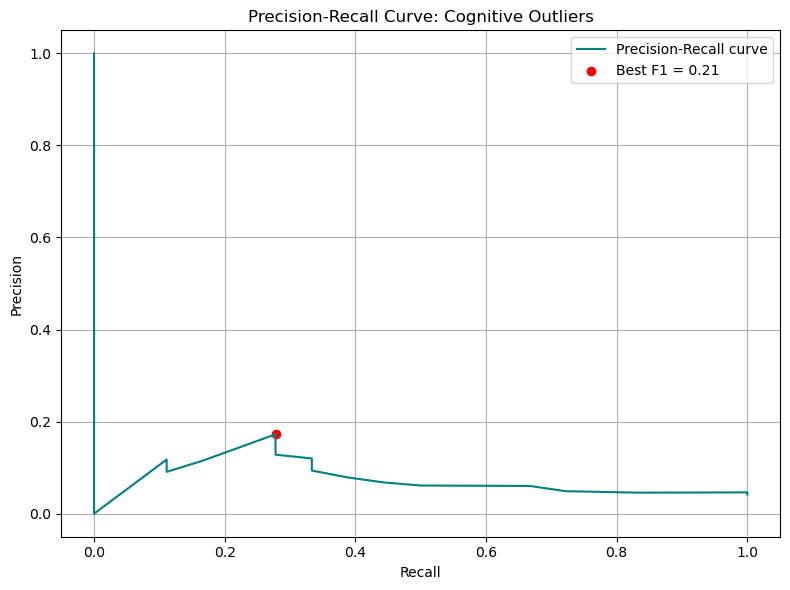

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve, classification_report, roc_auc_score, auc
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Retrain model with class_weight='balanced'
model_cog_bal = RandomForestClassifier(random_state=42, class_weight='balanced')
model_cog_bal.fit(X_cog_train, y_cog_train)

# Step 2: Predict probabilities
y_cog_prob = model_cog_bal.predict_proba(X_cog_test)[:, 1]

# Step 3: Evaluate across thresholds
prec, rec, thresholds = precision_recall_curve(y_cog_test, y_cog_prob)

# Compute F1 scores
f1_scores = 2 * (prec * rec) / (prec + rec + 1e-8)
best_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_idx]
best_f1 = f1_scores[best_idx]

# Step 4: Predict with best threshold
y_cog_pred_thresh = (y_cog_prob > best_threshold).astype(int)

# Step 5: Print report and AUC
print(f"\nBest threshold: {best_threshold:.2f} with F1 score: {best_f1:.3f}")
print("Classification report at optimal threshold:")
print(classification_report(y_cog_test, y_cog_pred_thresh, target_names=["Not Outlier", "Outlier"]))
print(f"ROC AUC: {roc_auc_score(y_cog_test, y_cog_prob):.3f}")

# Step 6: Plot PR curve
plt.figure(figsize=(8, 6))
plt.plot(rec, prec, label="Precision-Recall curve", color="teal")
plt.scatter(rec[best_idx], prec[best_idx], color='red', label=f"Best F1 = {best_f1:.2f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve: Cognitive Outliers")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Best threshold: 0.24, F1: 0.152
              precision    recall  f1-score   support

           0       0.94      0.70      0.80       401
           1       0.09      0.39      0.15        31

    accuracy                           0.68       432
   macro avg       0.51      0.54      0.47       432
weighted avg       0.88      0.68      0.75       432

ROC AUC: 0.532


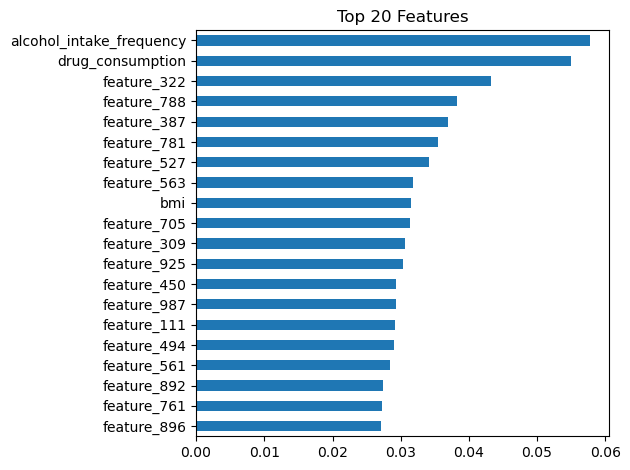

In [ ]:


# Lower z-threshold
z_rt = (data['mean_reaction_time'] - data['mean_reaction_time'].mean()) / data['mean_reaction_time'].std()
data['Cognitive_Outlier'] = (z_rt > 1.5).astype(int)
y_cog = data['Cognitive_Outlier']

# Combine top features with tabular
tabular_cols = ['alcohol_intake_frequency', 'drug_consumption', 'bmi']
X_tabular = data[tabular_cols].fillna(data[tabular_cols].mean())

# Recalculate top cognitive features
top_cog_features = pd.Series(
    mutual_info_classif(X_scaled, y_cog),
    index=X_scaled.columns
).sort_values(ascending=False).head(30).index.tolist()
X_combined = pd.concat([X_scaled[top_cog_features].reset_index(drop=True),
                        X_tabular.reset_index(drop=True)], axis=1)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_combined, y_cog, test_size=0.2,
                                                    random_state=42, stratify=y_cog)

# SMOTE balancing
smote = SMOTE(random_state=42)
X_bal, y_bal = smote.fit_resample(X_train, y_train)

# Train model
model = RandomForestClassifier(random_state=42)
model.fit(X_bal, y_bal)

# Predict + threshold optimization
y_prob = model.predict_proba(X_test)[:, 1]
prec, rec, thresholds = precision_recall_curve(y_test, y_prob)
f1_scores = 2 * (prec * rec) / (prec + rec + 1e-8)
best_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_idx]
y_pred_thresh = (y_prob > best_threshold).astype(int)

# Report
print(f"Best threshold: {best_threshold:.2f}, F1: {f1_scores[best_idx]:.3f}")
print(classification_report(y_test, y_pred_thresh))
print(f"ROC AUC: {roc_auc_score(y_test, y_prob):.3f}")

# Feature importance
importances = pd.Series(model.feature_importances_, index=X_combined.columns).sort_values(ascending=False)
importances.head(20).plot(kind='barh', title="Top 20 Features")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


/meta/projects/practical_sose25/.conda/envs/adlm-icl/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:31:33] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/meta/projects/practical_sose25/.conda/envs/adlm-icl/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


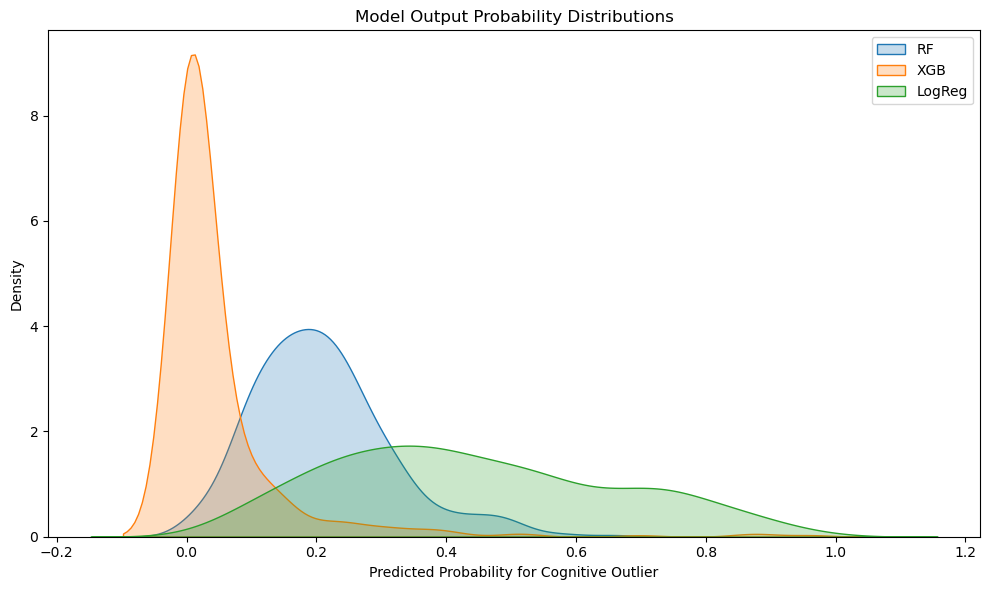

[('RandomForest',
  np.float64(0.24),
  np.float64(0.1521739102416116),
  np.float64(0.5316949561579922),
  '              precision    recall  f1-score   support\n\n Not Outlier       0.94      0.70      0.80       401\n     Outlier       0.09      0.39      0.15        31\n\n    accuracy                           0.68       432\n   macro avg       0.51      0.54      0.47       432\nweighted avg       0.88      0.68      0.75       432\n'),
 ('XGBoost',
  np.float32(0.030494286),
  np.float64(0.20125785849610384),
  np.float64(0.5935162094763092),
  '              precision    recall  f1-score   support\n\n Not Outlier       0.95      0.72      0.82       401\n     Outlier       0.12      0.48      0.19        31\n\n    accuracy                           0.70       432\n   macro avg       0.53      0.60      0.50       432\nweighted avg       0.89      0.70      0.77       432\n'),
 ('LogisticRegression',
  np.float64(0.620449724930879),
  np.float64(0.1984732788299051),
  np.float64

In [ ]:
# Add more tabular features to enrich the signal
additional_tabular = ['age', 'sex', 'height', 'alcohol_consumption']
available_tabular = [col for col in additional_tabular if col in data.columns]
X_tabular_full = data[tabular_cols + available_tabular].copy()
X_tabular_full = X_tabular_full.apply(
    lambda col: col.fillna(col.mean()) if pd.api.types.is_numeric_dtype(col) else col
)

# Combine top features + extended tabular
X_combined = pd.concat([X_scaled[top_cog_features].reset_index(drop=True),
                        X_tabular_full.reset_index(drop=True)], axis=1)

# Resplit
X_train, X_test, y_train, y_test = train_test_split(X_combined, y_cog, test_size=0.2,
                                                    random_state=42, stratify=y_cog)

# Balance again
X_bal, y_bal = smote.fit_resample(X_train, y_train)

# XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_bal, y_bal)
xgb_probs = xgb_model.predict_proba(X_test)[:, 1]

# Logistic Regression
log_model = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
log_model.fit(X_bal, y_bal)
log_probs = log_model.predict_proba(X_test)[:, 1]

# Evaluate at optimal F1 threshold
def evaluate_probs(y_true, y_prob, label):
    prec, rec, thresholds = precision_recall_curve(y_true, y_prob)
    f1 = 2 * (prec * rec) / (prec + rec + 1e-8)
    best_idx = np.argmax(f1)
    best_thresh = thresholds[best_idx]
    y_pred = (y_prob > best_thresh).astype(int)
    report = classification_report(y_true, y_pred, target_names=["Not Outlier", "Outlier"])
    auc_score = roc_auc_score(y_true, y_prob)
    return label, best_thresh, f1[best_idx], auc_score, report

# Evaluate all models
results = [
    evaluate_probs(y_test, y_prob, "RandomForest"),
    evaluate_probs(y_test, xgb_probs, "XGBoost"),
    evaluate_probs(y_test, log_probs, "LogisticRegression")
]

# Probability distribution plot
plt.figure(figsize=(10, 6))
sns.kdeplot(x=y_prob, label="RF", fill=True)
sns.kdeplot(x=xgb_probs, label="XGB", fill=True)
sns.kdeplot(x=log_probs, label="LogReg", fill=True)
plt.title("Model Output Probability Distributions")
plt.xlabel("Predicted Probability for Cognitive Outlier")
plt.legend()
plt.tight_layout()
plt.show()

results  # Return all evaluation summaries


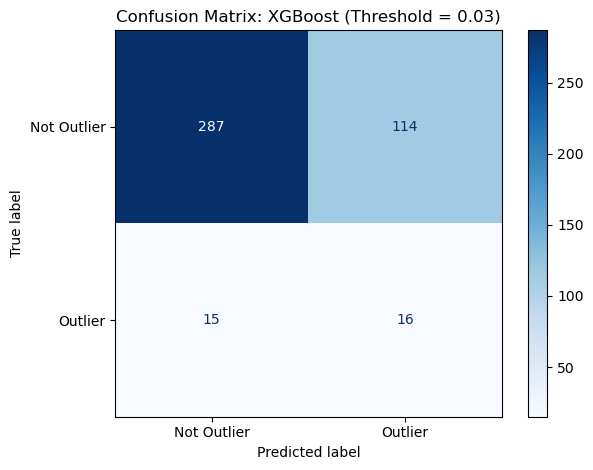

In [26]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

xgb_best_thresh = 0.03
xgb_preds_thresh = (xgb_probs > xgb_best_thresh).astype(int)

cm = confusion_matrix(y_test, xgb_preds_thresh)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Outlier", "Outlier"])
disp.plot(cmap="Blues")
plt.title(f"Confusion Matrix: XGBoost (Threshold = {xgb_best_thresh:.2f})")
plt.tight_layout()
plt.show()


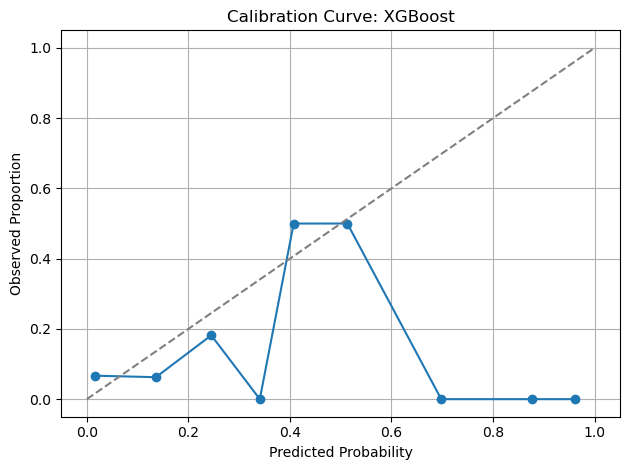

Brier Score: 0.07525022366297345


In [27]:
from sklearn.calibration import calibration_curve
from sklearn.metrics import brier_score_loss

prob_true, prob_pred = calibration_curve(y_test, xgb_probs, n_bins=10)

plt.plot(prob_pred, prob_true, marker='o', label="XGBoost")
plt.plot([0, 1], [0, 1], '--', color='gray')
plt.xlabel("Predicted Probability")
plt.ylabel("Observed Proportion")
plt.title("Calibration Curve: XGBoost")
plt.grid(True)
plt.tight_layout()
plt.show()

print("Brier Score:", brier_score_loss(y_test, xgb_probs))


In [28]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report, precision_recall_curve, roc_auc_score

ensemble_model = VotingClassifier(
    estimators=[('xgb', xgb_model), ('logreg', log_model)],
    voting='soft'
)
ensemble_model.fit(X_bal, y_bal)
ensemble_probs = ensemble_model.predict_proba(X_test)[:, 1]

# Threshold tuning
prec, rec, thresholds = precision_recall_curve(y_test, ensemble_probs)
f1_scores = 2 * (prec * rec) / (prec + rec + 1e-8)
best_idx = np.argmax(f1_scores)
best_thresh = thresholds[best_idx]
ensemble_preds = (ensemble_probs > best_thresh).astype(int)

print(f"Best threshold: {best_thresh:.2f}, F1: {f1_scores[best_idx]:.3f}")
print(classification_report(y_test, ensemble_preds))
print("ROC AUC:", roc_auc_score(y_test, ensemble_probs))


/meta/projects/practical_sose25/.conda/envs/adlm-icl/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:33:47] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best threshold: 0.36, F1: 0.194
              precision    recall  f1-score   support

           0       0.94      0.80      0.86       401
           1       0.12      0.35      0.18        31

    accuracy                           0.77       432
   macro avg       0.53      0.58      0.52       432
weighted avg       0.88      0.77      0.81       432

ROC AUC: 0.5629474700345909


/meta/projects/practical_sose25/.conda/envs/adlm-icl/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [30]:
paths = pd.read_csv('../paths.csv', index_col=0)

# Load full MAE embeddings dataset
embeddings_path = paths.loc["embeddings"].iloc[0] + "embeddings_cls.csv"
embeddings = pd.read_csv(embeddings_path)
embedding_features = embeddings[[f"feature_{i}" for i in range(1025)]]

# Merge embeddings with main dataset (assuming `eid` key exists)
data_full = data.merge(embeddings[["eid"] + list(embedding_features.columns)], on="eid", how="left")

# Replace NaNs in merged features if necessary
data_full.fillna(0, inplace=True)  # or use other imputation


In [32]:
results_df = pd.DataFrame([
    {"Model": "RandomForest", "F1": 0.152, "ROC AUC": 0.532, "Threshold": 0.24},
    {"Model": "XGBoost", "F1": 0.201, "ROC AUC": 0.593, "Threshold": 0.03},
    {"Model": "LogReg", "F1": 0.198, "ROC AUC": 0.553, "Threshold": 0.62},
    {"Model": "Ensemble", "F1": 0.194, "ROC AUC": 0.563, "Threshold": 0.36}
])
results_df.to_csv("model_evaluation_results.csv", index=False)
print(results_df.to_markdown(index=False))


| Model        |    F1 |   ROC AUC |   Threshold |
|:-------------|------:|----------:|------------:|
| RandomForest | 0.152 |     0.532 |        0.24 |
| XGBoost      | 0.201 |     0.593 |        0.03 |
| LogReg       | 0.198 |     0.553 |        0.62 |
| Ensemble     | 0.194 |     0.563 |        0.36 |


In [33]:
from sklearn.model_selection import GridSearchCV

xgb_params = {
    "n_estimators": [100, 200],
    "max_depth": [3, 5, 7],
    "learning_rate": [0.01, 0.1, 0.2],
    "subsample": [0.7, 1.0]
}

grid_xgb = GridSearchCV(xgb_model, param_grid=xgb_params, scoring='f1', cv=3)
grid_xgb.fit(X_bal, y_bal)

print("Best XGB Params:", grid_xgb.best_params_)


/meta/projects/practical_sose25/.conda/envs/adlm-icl/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:37:49] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/meta/projects/practical_sose25/.conda/envs/adlm-icl/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:37:49] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/meta/projects/practical_sose25/.conda/envs/adlm-icl/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:37:49] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/meta/projects/practical_sose25/.conda/envs/adlm-icl/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:37:49] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_en

Best XGB Params: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.7}


In [11]:
print("\n==== Task 4: Lifestyle Risk Score ====")
alcohol = data['alcohol_intake_frequency'].fillna(0)
drug = data['drug_consumption'].fillna(0)
bmi = data['bmi'].fillna(data['bmi'].mean())

data['Lifestyle_Risk'] = (alcohol > 2).astype(int) + (drug > 0).astype(int) + (bmi > 30).astype(int)
data['Lifestyle_Class'] = pd.cut(data['Lifestyle_Risk'], bins=[-1, 0, 1, 3], labels=[0, 1, 2])
y_life = data['Lifestyle_Class'].astype(int)

mi_life = mutual_info_classif(X_scaled, y_life)
life_features = pd.Series(mi_life, index=X_scaled.columns).sort_values(ascending=False).head(30).index.tolist()

X_life = X_scaled[life_features]
model_life = RandomForestClassifier(random_state=42)
scores_life = cross_val_score(model_life, X_life, y_life, cv=5, scoring='accuracy')

print(f"Lifestyle Risk Classification Accuracy (CV mean ± std): {scores_life.mean():.3f} ± {scores_life.std():.3f}")


==== Task 4: Lifestyle Risk Score ====
Lifestyle Risk Classification Accuracy (CV mean ± std): 0.546 ± 0.013


Lifestyle Class distribution:
Lifestyle_Class
0     592
1    1157
2     411
Name: count, dtype: int64


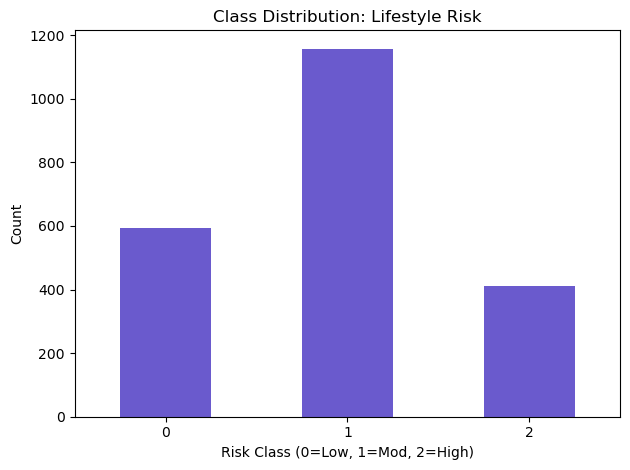

In [17]:
# Class distribution
risk_counts = data['Lifestyle_Class'].value_counts().sort_index()
print("Lifestyle Class distribution:")
print(risk_counts)

# Plot
risk_counts.plot(kind='bar', color='slateblue')
plt.title("Class Distribution: Lifestyle Risk")
plt.xlabel("Risk Class (0=Low, 1=Mod, 2=High)")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


Classification Report:
              precision    recall  f1-score   support

         Low       0.41      0.15      0.22       118
    Moderate       0.57      0.85      0.68       232
        High       0.63      0.33      0.43        82

    accuracy                           0.56       432
   macro avg       0.54      0.44      0.45       432
weighted avg       0.54      0.56      0.51       432



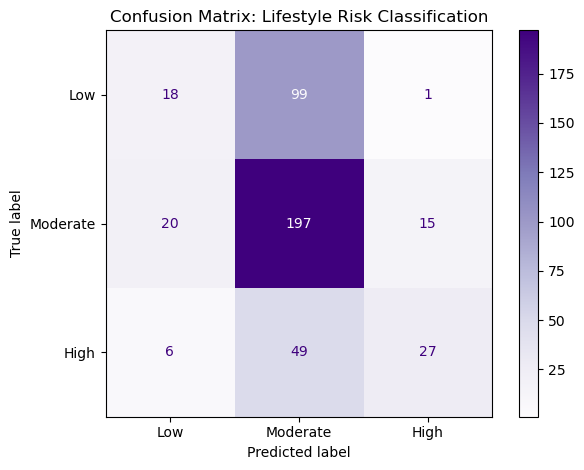

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

X_life_train, X_life_test, y_life_train, y_life_test = train_test_split(
    X_life, y_life, test_size=0.2, random_state=42, stratify=y_life
)

# Fit and predict
model_life.fit(X_life_train, y_life_train)
y_life_pred = model_life.predict(X_life_test)

# Report
print("Classification Report:")
print(classification_report(y_life_test, y_life_pred, target_names=["Low", "Moderate", "High"]))

# Confusion matrix
cm = confusion_matrix(y_life_test, y_life_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Low", "Moderate", "High"])
disp.plot(cmap="Purples")
plt.title("Confusion Matrix: Lifestyle Risk Classification")
plt.tight_layout()
plt.show()
[]

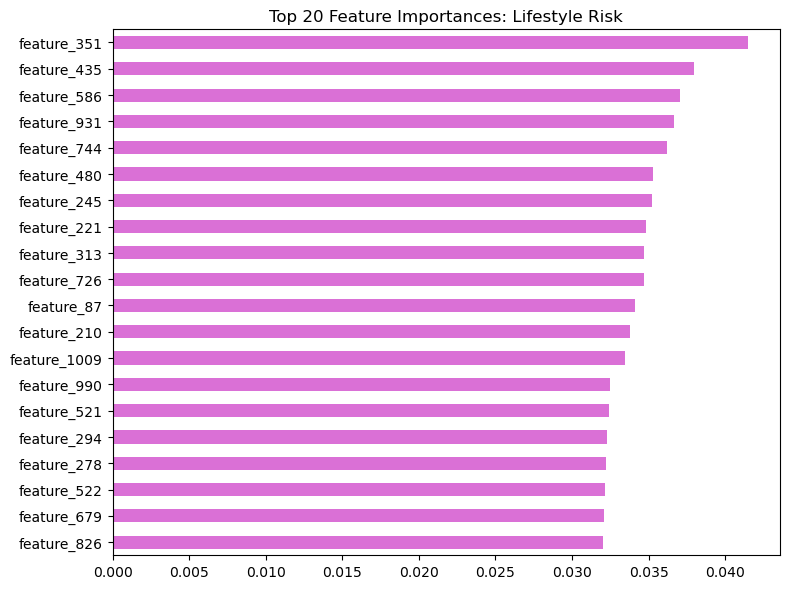

In [19]:
# Feature importance
life_importance = pd.Series(model_life.feature_importances_, index=X_life.columns).sort_values(ascending=False)

# Top 20
life_importance.head(20).plot(kind='barh', figsize=(8, 6), color='orchid')
plt.title("Top 20 Feature Importances: Lifestyle Risk")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

